# Multi-Armed Bandit with different exploration rates

Reproducing the results of figure 2.2 - Average reward and percentage of optimal action taken dependent on the exploration rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class MultiArmedBandit():
    
    def __init__(self):
        self._means = np.random.randn(10)
        self._optimal_action = np.argmax(self._means)
        
    def pull_arm(self, arm):
        return np.random.randn() + self._means[arm]
    
    def get_optimal_action(self):
        return self._optimal_action

In [3]:
def compute_action(eps, action_values):
    if np.random.rand() < eps:
        return np.random.randint(10)
    else:
        return np.argmax(action_values)
    
def update_action_values(action_values, action_selected, next_action, next_reward):
    action_values[next_action] += 1 / action_selected[next_action] * (next_reward-action_values[next_action])
    action_selected[next_action] += 1
    
def update_statistics(rewards, optimal_action_chosen, next_reward, next_action, eps, bandit, step):
    if next_action == optimal_action:
        optimal_action_chosen[step, bandit, eps] = 1
    rewards[step, bandit, eps] = next_reward

In [4]:
n_timesteps = 5000
rewards = np.zeros((n_timesteps,2000, 3))
optimal_action_chosen = np.zeros((n_timesteps,2000, 3))
eps_values = [0,0.01, 0.1]

for idx, eps in enumerate(eps_values):
    for bandit in range(2000):
        mba = MultiArmedBandit()
        optimal_action = mba.get_optimal_action()
        action_values = np.zeros(10)
        action_selected = np.ones(10)
        for step in range(n_timesteps):
            next_action = compute_action(eps, action_values)
            next_reward = mba.pull_arm(next_action)
            update_action_values(action_values, action_selected, next_action, next_reward)
            update_statistics(rewards, optimal_action_chosen, next_reward, next_action, idx, bandit, step)

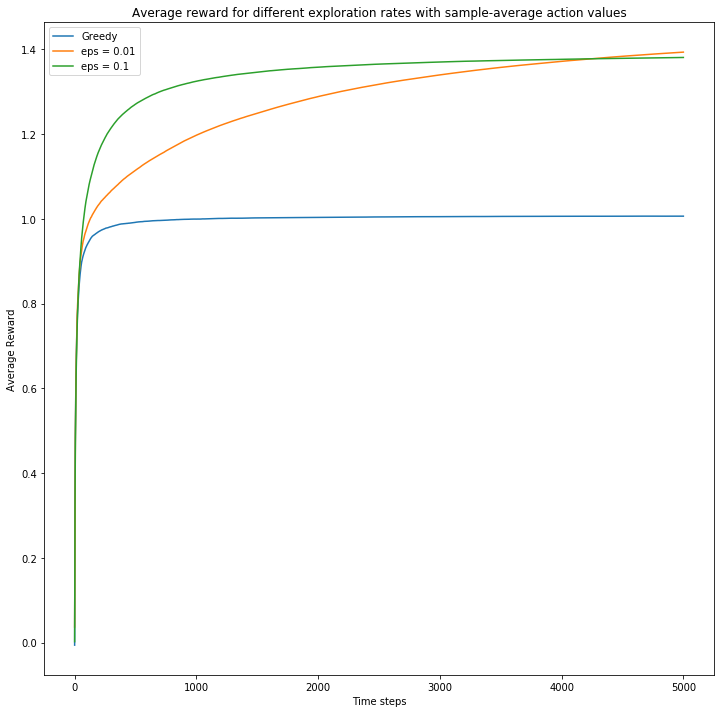

In [5]:
average_rewards = np.zeros((n_timesteps,3))
average_rewards = np.mean(rewards, axis = 1)
for i in range(3):
    average_rewards[:,i] = [x / y for (x,y) in zip(np.cumsum(average_rewards[:,i]), np.arange(1,n_timesteps+1))]

fig = plt.figure(figsize=(12,12))
for i in range(3):
    plt.plot(range(1,n_timesteps+1),average_rewards[:,i])
plt.title('Average reward for different exploration rates with sample-average action values')
plt.xlabel('Time steps')
plt.ylabel('Average Reward')
plt.legend(['Greedy', 'eps = 0.01', 'eps = 0.1'])

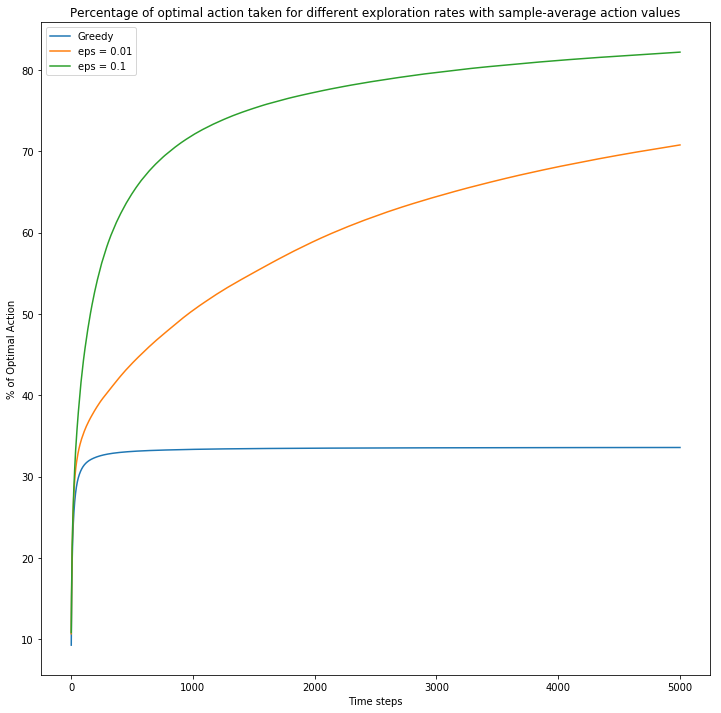

In [6]:
sum_optimal_actions_chosen = np.cumsum(optimal_action_chosen, axis = 0)
sum_optimal_actions_chosen = np.mean(sum_optimal_actions_chosen, axis = 1)
for i in range(3):
    sum_optimal_actions_chosen[:,i] = [x / y for (x,y) in \
                                       zip(sum_optimal_actions_chosen[:,i], np.arange(1,n_timesteps+1))]
fig = plt.figure(figsize=(12,12))
for i in range(3):
    plt.plot(range(1,n_timesteps+1),100*sum_optimal_actions_chosen[:,i])
plt.title('Percentage of optimal action taken for different exploration rates with sample-average action values')
plt.xlabel('Time steps')
plt.ylabel('% of Optimal Action')
plt.legend(['Greedy', 'eps = 0.01', 'eps = 0.1'])